In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('animalsAbandon.csv')
df.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A771830,*Bradley,12/27/2018 01:25:00 PM,12/27/2018 01:25:00 PM,05/10/2017,Adoption,Foster,Dog,Neutered Male,1 year,Pit Bull Mix,White/Blue
1,A779576,*Rajah,10/01/2018 05:03:00 PM,10/01/2018 05:03:00 PM,04/18/2018,Adoption,NaN,Cat,Neutered Male,5 months,Domestic Shorthair Mix,Brown Tabby
2,A741715,*Pebbles,01/11/2017 06:17:00 PM,01/11/2017 06:17:00 PM,03/07/2016,Adoption,NaN,Cat,Spayed Female,10 months,Domestic Shorthair Mix,Calico
3,A658751,Benji,11/13/2016 01:38:00 PM,11/13/2016 01:38:00 PM,07/14/2011,Return to Owner,NaN,Dog,Neutered Male,5 years,Border Terrier Mix,Tan
4,A721285,NaN,02/24/2016 02:42:00 PM,02/24/2016 02:42:00 PM,02/24/2014,Euthanasia,Suffering,Other,Unknown,2 years,Raccoon Mix,Black/Gray


In [3]:
df['Animal Type'].unique()

array(['Dog', 'Cat', 'Other', 'Bird', 'Livestock'], dtype=object)

In [4]:
df['Sex upon Outcome'].unique()

array(['Neutered Male', 'Spayed Female', 'Unknown', 'Intact Female',
       'Intact Male', nan], dtype=object)

In [5]:
df['Age upon Outcome'].unique()

array(['1 year', '5 months', '10 months', '5 years', '2 years', '1 month',
       '3 years', '8 months', '3 weeks', '9 years', '2 weeks', '4 months',
       '2 months', '6 years', '10 years', '13 years', '4 years',
       '6 months', '3 months', '11 years', '1 week', '9 months',
       '4 weeks', '11 months', '8 years', '7 years', '12 years',
       '7 months', '1 weeks', '3 days', '5 days', '14 years', '2 days',
       '5 weeks', '4 days', '15 years', '16 years', '17 years', '6 days',
       '1 day', '18 years', '0 years', nan, '24 years', '19 years',
       '20 years', '22 years', '25 years', '-1 years'], dtype=object)

In [6]:
df['Outcome Type'].unique()

array(['Adoption', 'Return to Owner', 'Euthanasia', 'Transfer', 'Died',
       'Rto-Adopt', 'Disposal', 'Missing', 'Relocate', nan], dtype=object)

In [7]:
a = df[df['Age upon Outcome'] == '0 years']
a

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
3778,A770577,*Bun 1,04/22/2018 03:39:00 PM,04/22/2018 03:39:00 PM,04/22/2018,Transfer,Partner,Other,Unknown,0 years,Rabbit Sh Mix,Black
4174,A770597,*Bun 5,04/22/2018 03:40:00 PM,04/22/2018 03:40:00 PM,04/22/2018,Transfer,Partner,Other,Unknown,0 years,Rabbit Sh Mix,Black
4308,A693138,NaN,12/02/2014 07:01:00 PM,12/02/2014 07:01:00 PM,12/02/2014,Transfer,Partner,Other,Unknown,0 years,Rabbit Sh Mix,Pink
4757,A728459,NaN,06/04/2016 07:20:00 PM,06/04/2016 07:20:00 PM,06/04/2016,Transfer,Partner,Dog,Unknown,0 years,Chow Chow Mix,Brown/White
5207,A750151,NaN,05/23/2017 06:17:00 PM,05/23/2017 06:17:00 PM,05/23/2017,Transfer,Partner,Cat,Intact Male,0 years,Domestic Shorthair Mix,Brown Tabby
...,...,...,...,...,...,...,...,...,...,...,...,...
89874,A728454,NaN,06/04/2016 07:16:00 PM,06/04/2016 07:16:00 PM,06/04/2016,Transfer,Partner,Dog,Unknown,0 years,Chow Chow Mix,Black/White
90384,A677821,NaN,04/29/2014 06:49:00 PM,04/29/2014 06:49:00 PM,04/29/2014,Transfer,Partner,Other,Unknown,0 years,Rabbit Sh Mix,Black/White
91812,A710575,NaN,08/24/2015 06:56:00 PM,08/24/2015 06:56:00 PM,08/24/2015,Transfer,Partner,Cat,Unknown,0 years,Domestic Shorthair Mix,Orange Tabby/White
94412,A730076,NaN,06/28/2016 11:34:00 AM,06/28/2016 11:34:00 AM,06/28/2016,Transfer,Partner,Cat,Unknown,0 years,Domestic Shorthair Mix,Calico


In [8]:
def Age(x):
    if pd.isnull(x):
        return -1
    num = int(x.split(' ')[0])
    
    if 'year' in x:
        return num * 365
    elif 'month' in x:
        return num *30
    elif 'week' in x:
        return num *7
    else:
        return num

In [9]:
df['Age upon Outcome'] = df['Age upon Outcome'].apply(Age)
df

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A771830,*Bradley,12/27/2018 01:25:00 PM,12/27/2018 01:25:00 PM,05/10/2017,Adoption,Foster,Dog,Neutered Male,365,Pit Bull Mix,White/Blue
1,A779576,*Rajah,10/01/2018 05:03:00 PM,10/01/2018 05:03:00 PM,04/18/2018,Adoption,NaN,Cat,Neutered Male,150,Domestic Shorthair Mix,Brown Tabby
2,A741715,*Pebbles,01/11/2017 06:17:00 PM,01/11/2017 06:17:00 PM,03/07/2016,Adoption,NaN,Cat,Spayed Female,300,Domestic Shorthair Mix,Calico
3,A658751,Benji,11/13/2016 01:38:00 PM,11/13/2016 01:38:00 PM,07/14/2011,Return to Owner,NaN,Dog,Neutered Male,1825,Border Terrier Mix,Tan
4,A721285,NaN,02/24/2016 02:42:00 PM,02/24/2016 02:42:00 PM,02/24/2014,Euthanasia,Suffering,Other,Unknown,730,Raccoon Mix,Black/Gray
...,...,...,...,...,...,...,...,...,...,...,...,...
95362,A788329,Bane,01/31/2019 03:27:00 PM,01/31/2019 03:27:00 PM,09/07/2017,Return to Owner,NaN,Dog,Intact Male,365,Doberman Pinsch Mix,Black/Brown
95363,A788087,Midnight,01/26/2019 06:06:00 PM,01/26/2019 06:06:00 PM,05/26/2018,Return to Owner,NaN,Dog,Intact Female,240,German Shepherd Mix,Black
95364,A759491,Charlie,01/31/2019 04:17:00 PM,01/31/2019 04:17:00 PM,10/03/2012,Return to Owner,NaN,Dog,Neutered Male,2190,Pug Mix,Tan/Black
95365,A722968,Glacier,01/31/2019 04:59:00 PM,01/31/2019 04:59:00 PM,03/24/2015,Adoption,NaN,Cat,Neutered Male,1095,Siamese Mix,Seal Point


In [10]:
x=df[['Animal Type','Sex upon Outcome','Age upon Outcome']]
x[0:5]

,Animal Type,Sex upon Outcome,Age upon Outcome
0,Dog,Neutered Male,365
1,Cat,Neutered Male,150
2,Cat,Spayed Female,300
3,Dog,Neutered Male,1825
4,Other,Unknown,730


In [11]:
df['Age upon Outcome'].unique()

array([ 365,  150,  300, 1825,  730,   30, 1095,  240,   21, 3285,   14,
        120,   60, 2190, 3650, 4745, 1460,  180,   90, 4015,    7,  270,
         28,  330, 2920, 2555, 4380,  210,    3,    5, 5110,    2,   35,
          4, 5475, 5840, 6205,    6,    1, 6570,    0,   -1, 8760, 6935,
       7300, 8030, 9125, -365], dtype=int64)

In [12]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Animal Type']= label_encoder.fit_transform(df['Animal Type'])
 
df['Animal Type'].unique()

array([2, 1, 4, 0, 3])

In [13]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Sex upon Outcome']= label_encoder.fit_transform(df['Sex upon Outcome'])
 
df['Sex upon Outcome'].unique()

array([2, 3, 4, 0, 1, 5])

In [14]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['Age upon Outcome']=label_encoder.fit_transform(df['Age upon Outcome'])
df['Age upon Outcome'].unique()

array([25, 18, 23, 29, 26, 13, 27, 21, 11, 33, 10, 17, 15, 30, 34, 37, 28,
       19, 16, 35,  9, 22, 12, 24, 32, 31, 36, 20,  5,  7, 38,  4, 14,  6,
       39, 40, 41,  8,  3, 42,  2,  1, 46, 43, 44, 45, 47,  0],
      dtype=int64)

In [15]:
x=df[['Animal Type','Sex upon Outcome','Age upon Outcome']]
x[0:5]

,Animal Type,Sex upon Outcome,Age upon Outcome
0,2,2,25
1,1,2,18
2,1,3,23
3,2,2,29
4,4,4,26


In [16]:
y=df['Outcome Type'].values
y[0:5]

array(['Adoption', 'Adoption', 'Adoption', 'Return to Owner',
       'Euthanasia'], dtype=object)

In [17]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['Outcome Type']=label_encoder.fit_transform(df['Outcome Type'])
df['Outcome Type'].unique()

array([0, 6, 3, 8, 1, 7, 2, 4, 5, 9])

In [18]:
y=df['Outcome Type']
y[0:5]

0    0
1    0
2    0
3    6
4    3
Name: Outcome Type, dtype: int32

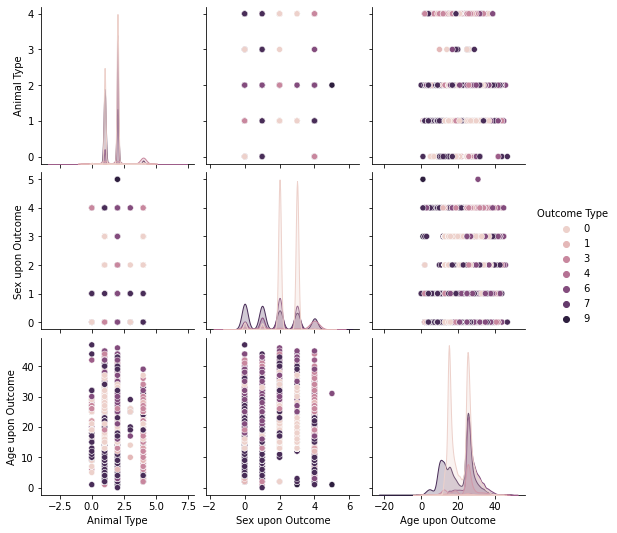

In [19]:
sns.pairplot(data=df,hue='Outcome Type')

<AxesSubplot:>

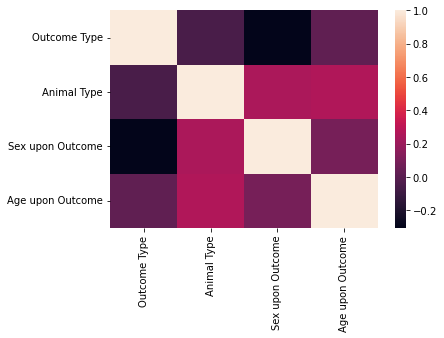

In [20]:
sns.heatmap(df.corr())

C:\Users\Uttu_Joshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome Type', ylabel='count'>

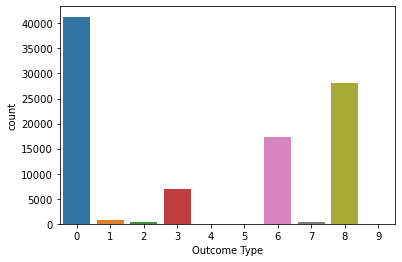

In [21]:
import seaborn as sns
sns.countplot(df['Outcome Type'])

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [24]:
knn.score(x_test,y_test)

0.634528677781273

In [25]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[6646,    0,    0,   27,    0,    0, 1126,    0,  519,    0],
       [  17,    1,    0,   26,    0,    0,   14,    0,   98,    0],
       [   8,    0,    0,   52,    0,    0,    1,    0,    4,    0],
       [ 135,    0,    0,  765,    0,    0,  217,    0,  324,    0],
       [   4,    0,    0,    0,    0,    0,    1,    0,    6,    0],
       [   1,    0,    0,    5,    0,    0,    0,    0,    0,    0],
       [1456,    0,    0,   17,    0,    0, 1503,    0,  464,    0],
       [  34,    0,    0,    1,    0,    0,   20,    0,    6,    0],
       [1526,    1,    0,  111,    0,    0,  748,    0, 3188,    0],
       [   0,    0,    0,    1,    0,    0,    0,    0,    1,    0]],
      dtype=int64)

Text(69.0, 0.5, 'Truth')

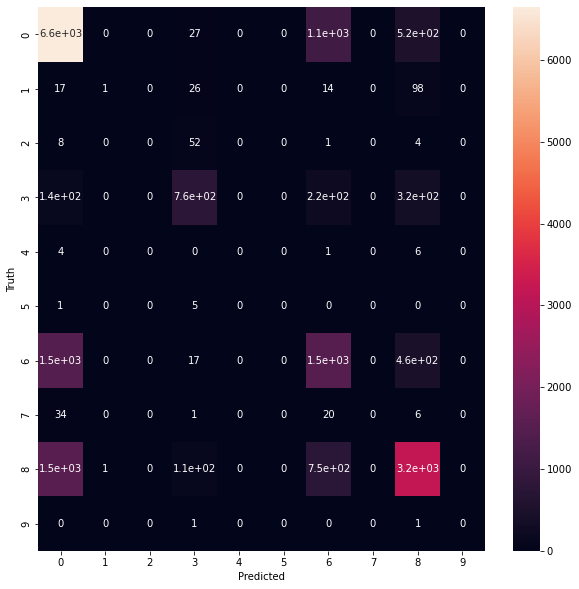

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
dtree.score(x_test,y_test)

0.6577015833071196

In [29]:
from sklearn.cluster import KMeans

In [30]:
km=KMeans(n_clusters=10)
y_predicted=km.fit_predict(df[['Animal Type','Sex upon Outcome','Age upon Outcome']])
y_predicted

array([0, 7, 5, ..., 8, 0, 0])

In [31]:
df['cluster']=y_predicted
df.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,cluster
0,A771830,*Bradley,12/27/2018 01:25:00 PM,12/27/2018 01:25:00 PM,05/10/2017,0,Foster,2,2,25,Pit Bull Mix,White/Blue,0
1,A779576,*Rajah,10/01/2018 05:03:00 PM,10/01/2018 05:03:00 PM,04/18/2018,0,NaN,1,2,18,Domestic Shorthair Mix,Brown Tabby,7
2,A741715,*Pebbles,01/11/2017 06:17:00 PM,01/11/2017 06:17:00 PM,03/07/2016,0,NaN,1,3,23,Domestic Shorthair Mix,Calico,5
3,A658751,Benji,11/13/2016 01:38:00 PM,11/13/2016 01:38:00 PM,07/14/2011,6,NaN,2,2,29,Border Terrier Mix,Tan,8
4,A721285,NaN,02/24/2016 02:42:00 PM,02/24/2016 02:42:00 PM,02/24/2014,3,Suffering,4,4,26,Raccoon Mix,Black/Gray,9


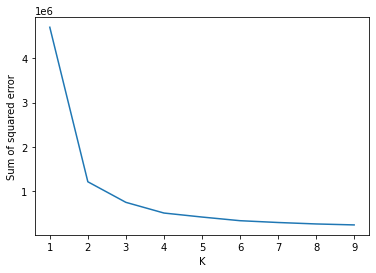

In [32]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Animal Type','Sex upon Outcome','Age upon Outcome']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [33]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier()

In [34]:
model.score(x_test,y_test)

0.6579112928593898

In [35]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,model.predict(x_test))
cm

array([[7136,    2,    0,   12,    0,    0,  796,    0,  372,    0],
       [  14,    0,    0,   24,    0,    0,   16,    0,  102,    0],
       [   8,    0,    0,   52,    0,    0,    1,    0,    4,    0],
       [ 159,    0,    0,  738,    0,    0,  194,    0,  350,    0],
       [   3,    0,    0,    0,    0,    0,    1,    0,    7,    0],
       [   2,    0,    0,    4,    0,    0,    0,    0,    0,    0],
       [1560,    1,    0,   12,    0,    0, 1456,    0,  411,    0],
       [  43,    0,    0,    1,    0,    0,   15,    0,    2,    0],
       [1648,    1,    0,   83,    0,    0,  623,    0, 3219,    0],
       [   0,    0,    0,    1,    0,    0,    0,    0,    1,    0]],
      dtype=int64)

Text(69.0, 0.5, 'Truth')

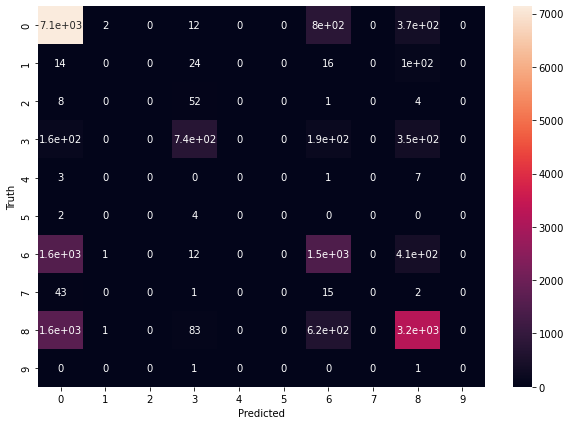

In [36]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [39]:
model.score(x_test,y_test)

0.6400335535283632

In [40]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [41]:
model.score(x_test,y_test)

0.49596309111880044